## Describel Heights to ET
- A distribution is a function or description tha shows the possible values og a variable and how often those values occur.
- For categorical variables, the distribution describes the proportions of each category.
- A frequency table is the simplest way to show a categorical distribution. Use prop.table() to convert a table of counts to a frequency table. Barplots display the distribution of categorical variables and are a way to visualize the information in frequency tables.
- For continuous numerical data, reporting the frequency of each unique entry is not an effective summary as many or most values are unique. Instead, a distribution function is required.
- The cumulative distribution function (CDF) is a function that reports the proportion of data below a value  a  for all values of  a :  F(a)=Pr(x≤a) .
- The proportion of observations between any two values  a  and  b  can be computed from the CDF as  F(b)−F(a) .
- A histogram divides data into non-overlapping bins of the same size and plots the counts of number of values that fall in that interval.

In [ ]:
# make a table of category proportions
prop.table(table(heights$sex))


   Female      Male 
0.2266667 0.7733333 

##Cumulative Distribution Function
- Every continuous distribution has a cumulative distribution function (CDF). The CDF defines the proportion of the data below a given value  a  for all values of  a :
        F(a)=Pr(x≤a) 
      
- Any continuous dataset has a CDF, not only normal distributions. For example, the male heights data we used in the previous section has this CDF.
- The CDF is essential for calculating probabilities related to continuous data. In a continuous dataset, the probability of a specific exact value is not informative because most entries are unique. For example, in the student heights data, only one individual reported a height of 68.8976377952726 inches, but many students rounded similar heights to 69 inches. If we computed exact value probabilities, we would find that being exactly 69 inches is much more likely than being a non-integer exact height, which does not match our understanding that height is continuous. We can instead use the CDF to obtain a useful summary, such as the probability that a student is between 68.5 and 69.5 inches. 
- For datasets that are not normal, the CDF can be calculated manually by defining a function to compute the probability above. This function can then be applied to a range of values across the range of the dataset to calculate a CDF. Given a dataset my_data, the CDF can be calculated and plotted like this:

In [ ]:
a <- seq(min(my_data), max(my_data), length = 100)    # define range of values spanning the dataset
cdf_function <- function(x) {    # computes prob. for a single value
    mean(my_data <= x)
}
cdf_values <- sapply(a, cdf_function)
plot(a, cdf_values)

- The CDF defines that proportion of data below a cutoff  a . To define the proportion of values above  a , we compute:

      1−F(a) 
- To define the proportion of values between  a  and  b , we compute:

      F(b)−F(a) 
- Note that the CDF can help compute probabilities. The probability of observing a randomly chosen value between  a  and  b  is equal to the proportion of values between  a  and  b , which we compute with the CDF.



## Smooth Density Plots
- Smooth density plots can be thought of as histograms where the bin width is extremely or infinitely small. The smoothing function makes estimates of the true continuous trend of the data given the available sample of data points.
- The degree of smoothness can be controlled by an argument in the plotting function. (We will learn functions for plotting later.)
- While the histogram is an assumption-free summary, the smooth density plot is shaped by assumptions and choices you make as a data analyst.
- The y-axis is scaled so that the area under the density curve sums to 1. This means that interpreting values on the y-axis is not straightforward. - To determine the proportion of data in between two values, compute the area under the smooth density curve in the region between those values.
An advantage of smooth densities over histograms is that densities are easier to compare visually.
-A further note on histograms: 
Note that the choice of binwidth has a determinative effect on shape. There is no "correct" choice for binwidth, and you can sometimes gain insights into the data by experimenting with binwidths.

## Assessment: Distributions
ezz

## Normal Distribution
- The normal distribution:
    - Is centered around one value, the mean
    - Is symmetric around the mean
    - Is defined completely by its mean ( μ ) and standard deviation (  σ  )
    - Always has the same proportion of observations within a given distance of the mean (for example, 95% within 2  σ )
- The standard deviation is the average distance between a value and the mean value.
- Calculate the mean using the mean() function.
- Calculate the standard deviation using the sd() function or manually. 
- Standard units describe how many standard deviations a value is away from the mean. The z-score, or number of standard deviations an observation  x  is away from the mean  μ :
      Z=(x−μ)/σ
- Compute standard units with the scale() function.
- Important: to calculate the proportion of values that meet a certain condition, use the mean() function on a logical vector. Because TRUE is converted to 1 and FALSE is converted to 0, taking the mean of this vector yields the proportion of TRUE.
- Equation for the normal distribution
The normal distribution is mathematically defined by the following formula for any mean  μ  and standard deviation  σ :
        

In [3]:
install.packages("dslabs")
# define x as vector of male heights
library(tidyverse)
library(dslabs)
data(heights)
index <- heights$sex=="Male"
x <- heights$height[index]

# calculate the mean and standard deviation manually
average <- sum(x)/length(x)
SD <- sqrt(sum((x - average)^2)/length(x))

# built-in mean and sd functions - note that the audio and printed values disagree
average <- mean(x)
SD <- sd(x)
c(average = average, SD = SD)

# calculate standard units
z <- scale(x)

# calculate proportion of values within 2 SD of mean
mean(abs(z) < 2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



average        SD 
69.314755  3.611024

[1] 0.9495074

- Note about the sd function
The built-in R function sd() calculates the standard deviation, but it divides by length(x)-1 instead of length(x). When the length of the list is large, this difference is negligible and you can use the built-in sd() function. Otherwise, you should compute  σ  by hand. For this course series, assume that you should use the sd() function unless you are told not to do so.

## Normal Distribution: Standard Units and Z-scores
1. Standard units
- For data that are approximately normal, standard units describe the number of standard deviations an observation is from the mean. Standard units are denoted by the variable  z  and are also known as z-scores.

- For any value  x  from a normal distribution with mean  μ  and standard deviation  σ , the value in standard units is:

      z=(x−μ)/σ 
- Standard units are useful for many reasons. Note that the formula for the normal distribution is simplified by substituting  z  in the exponent:

- When  z=0 , the normal distribution is at a maximum, the mean  μ . The function is defined to be symmetric around  z=0 .

- The normal distribution of z-scores is called the standard normal distribution and is defined by  μ=0  and  σ=1 .

- Z-scores are useful to quickly evaluate whether an observation is average or extreme. Z-scores near 0 are average. Z-scores above 2 or below -2 are significantly above or below the mean, and z-scores above 3 or below -3 are extremely rare. 

- We will learn more about benchmark z-score values and their corresponding probabilities below.
2. Code: Converting to standard units
- The scale function converts a vector of approximately normally distributed values into z-scores.
      z <- scale(x)
- You can compute the proportion of observations that are within 2 standard deviations of the mean like this:

      mean(abs(z) < 2)


## The Normal CDF and pnorm
- The normal distribution has a mathematically defined CDF which can be computed in R with the function pnorm().
- pnorm(a, avg, s) gives the value of the cumulative distribution function  F(a)  for the normal distribution defined by average avg and standard d eviation s.
- We say that a random quantity is normally distributed with average avg and standard deviation s if the approximation pnorm(a, avg, s) holds for all values of a.
- If we are willing to use the normal approximation for height, we can estimate the distribution simply from the mean and standard deviation of our values.
- If we treat the height data as discrete rather than categorical, we see that the data are not very useful because integer values are more common than expected due to rounding. This is called discretization.
- With rounded data, the normal approximation is particularly useful when computing probabilities of intervals of length 1 that include exactly one integer.

In [5]:
#1.Code: Using pnorm to calculate probabilities
#Given male heights x:
library(tidyverse)
library(dslabs)
data(heights)


In [6]:
x <- heights %>% filter(sex=="Male") %>% pull(height)
#We can estimate the probability that a male is taller than 70.5 inches with:
1 - pnorm(70.5, mean(x), sd(x))


[1] 0.371369

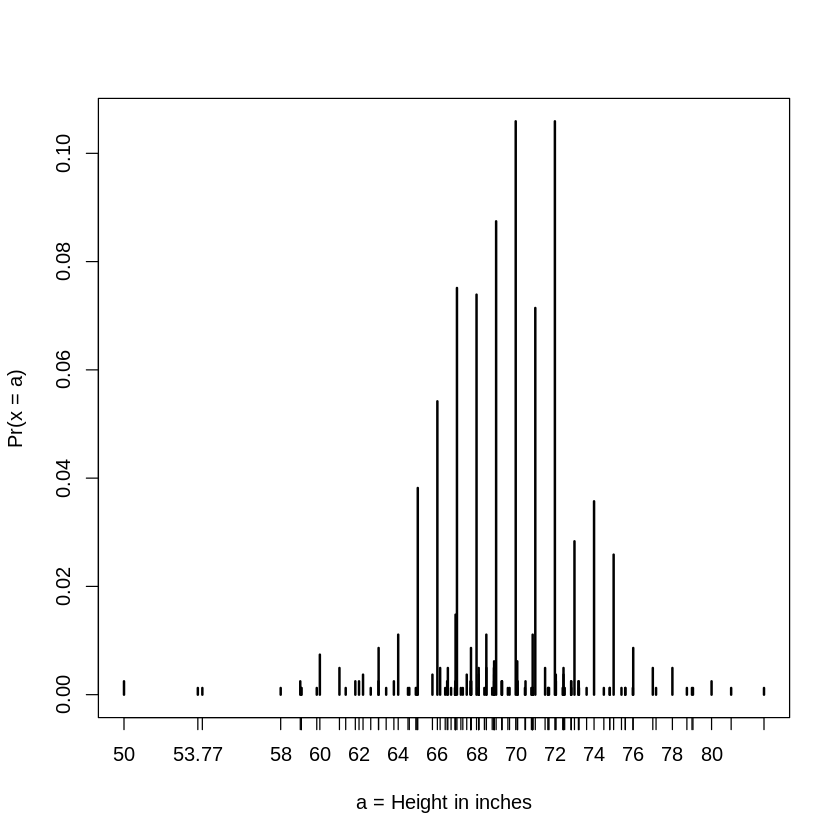

In [7]:
#2.Code: Discretization and the normal approximation
# plot distribution of exact heights in data
plot(prop.table(table(x)), xlab = "a = Height in inches", ylab = "Pr(x = a)")



In [8]:
# probabilities in actual data over length 1 ranges containing an integer
mean(x <= 68.5) - mean(x <= 67.5)
mean(x <= 69.5) - mean(x <= 68.5)
mean(x <= 70.5) - mean(x <= 69.5)


[1] 0.114532

[1] 0.1194581

[1] 0.1219212

In [12]:
# probabilities in normal approximation match well
pnorm(68.5, mean(x), sd(x)) - pnorm(67.5, mean(x), sd(x))
pnorm(69.5, mean(x), sd(x)) - pnorm(68.5, mean(x), sd(x))
pnorm(70.5, mean(x), sd(x)) - pnorm(69.5, mean(x), sd(x))


[1] 0.1031077

[1] 0.1097121

[1] 0.1081743

In [11]:
# probabilities in actual data over other ranges don't match normal approx as well
mean(x <= 70.9) - mean(x <= 70.1)
pnorm(70.9, mean(x), sd(x)) - pnorm(70.1, mean(x), sd(x))

[1] 0.02216749

[1] 0.08359562

##Assessment: Normal distribution

##Question 1
- What proportion of the data is between 69 and 72 inches (taller than 69 but shorter or equal to 72)? A proportion is between 0 and 1.
- Use the mean function in your code. Remember that you can use mean to compute the proportion of entries of a logical vector that are TRUE.

In [13]:
library(dslabs)
data(heights)
x <- heights$height[heights$sex == "Male"]
mean(x>69 & x<=72)

[1] 0.3337438

##Exercise 2. Averages and Standard Deviations

In [14]:
library(dslabs)
data(heights)
x <- heights$height[heights$sex=="Male"]
avg <- mean(x)
stdev <- sd(x)
pnorm(72,avg,stdev)-pnorm(69,avg,stdev)

[1] 0.3061779

##Exercise 3. Approximations

In [15]:
library(dslabs)
data(heights)
x <- heights$height[heights$sex == "Male"]
exact <- mean(x > 79 & x <= 81)
approx <- pnorm(81,mean(x),sd(x))-pnorm(79,mean(x),sd(x))
exact/approx

[1] 1.614261

##Exercise 4. Seven footers and the NBA

In [16]:
# use pnorm to calculate the proportion over 7 feet (7*12 inches)
1 - pnorm(12*7,69,3)

[1] 2.866516e-07

##Exercise 5. Estimating the number seven footers

In [17]:
p <- 1-pnorm(7*12,69,3)
round(p * 10^9)

[1] 287

##Exercise 6. How many seven footers are in the NBA?

In [18]:
p <- 1-pnorm(12*7,69,3)
N <- round(p*10^9)
10/N

[1] 0.03484321

##Exercise 7. Lebron James' height

In [19]:
## Change the solution to previous answer
p <- 1 - pnorm(6*12+8, 69, 3)
N <- round(p * 10^9)
150/N

[1] 0.001220842